In [1]:
import pandas as pd
import os

data_path = "D:\Coding\Resume-projects\\recommender-systems\\archive"

In [58]:
print("Loading dataframes")
orders = pd.read_csv(os.path.join(data_path, 'orders.csv'))
products = pd.read_csv(os.path.join(data_path, 'products.csv'))
order_products_prior = pd.read_csv(os.path.join(data_path, 'order_products__prior.csv'))
order_products_train = pd.read_csv(os.path.join(data_path, 'order_products__train.csv'))
aisles = pd.read_csv(os.path.join(data_path, 'aisles.csv'))
departments = pd.read_csv(os.path.join(data_path, 'departments.csv'))
print("Data loaded successfully!")

Loading dataframes
Data loaded successfully!


In [3]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [4]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [5]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [6]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [7]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [8]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [9]:
for name, df in {
    "orders": orders,
    "products": products,
    "order_products_prior": order_products_prior,
    "order_products_train": order_products_train,
    "aisles": aisles,
    "departments": departments
}.items():
    print(f"=== {name} ===")
    print(df.info())
    print(df.describe(), "\n\n")


=== orders ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB
None
           order_id       user_id  order_number     order_dow  \
count  3.421083e+06  3.421083e+06  3.421083e+06  3.421083e+06   
mean   1.710542e+06  1.029782e+05  1.715486e+01  2.776219e+00   
std    9.875817e+05  5.953372e+04  1.773316e+01  2.046829e+00   
min    1.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%    8.552715e+05  5.139400e+04  5.000000e+00  1.000000e+00   
50%    1.710542e+06  1.026890e+05  1.100000e+01  3.000000e+00   
75%    2.565812e

In [10]:
orders["eval_set"].unique()

array(['prior', 'train', 'test'], dtype=object)

In [11]:
print(orders.shape)
print(products.shape)
print(order_products_prior.shape)

(3421083, 7)
(49688, 4)
(32434489, 4)


In [12]:
# Missing values
print("Missing values in orders:")
print(orders.isnull().sum(), "\n")

# Unique counts 
print(f"Unique users: {orders['user_id'].nunique()}")
print(f"Unique products: {products['product_id'].nunique()}")
print(f"Unique orders: {orders['order_id'].nunique()}\n")

# Popular products
popular_products = (
    order_products_prior["product_id"]
    .value_counts()
    .head(10)
    .rename_axis("product_id")
    .reset_index(name="purchases")
    .merge(products, on="product_id", how="left")
)
print("Top 10 most purchased products:")
print(popular_products[["product_id", "product_name", "purchases"]], "\n")

# Reorder ratio
reorder_ratio = order_products_prior["reordered"].mean()
print(f"Overall reorder ratio: {reorder_ratio:.2f}")

# Days since prior order distribution
print("\nDays since prior order summary:")
print(orders["days_since_prior_order"].describe())


Missing values in orders:
order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64 

Unique users: 206209
Unique products: 49688
Unique orders: 3421083

Top 10 most purchased products:
   product_id            product_name  purchases
0       24852                  Banana     472565
1       13176  Bag of Organic Bananas     379450
2       21137    Organic Strawberries     264683
3       21903    Organic Baby Spinach     241921
4       47209    Organic Hass Avocado     213584
5       47766         Organic Avocado     176815
6       47626             Large Lemon     152657
7       16797            Strawberries     142951
8       26209                   Limes     140627
9       27845      Organic Whole Milk     137905 

Overall reorder ratio: 0.59

Days since prior order summary:
count    3.214874e+06
mean

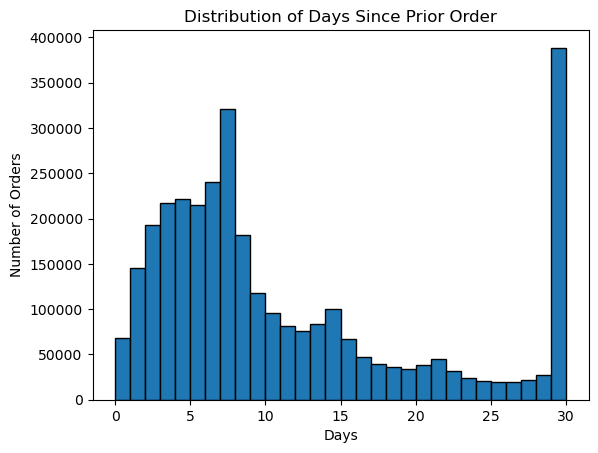

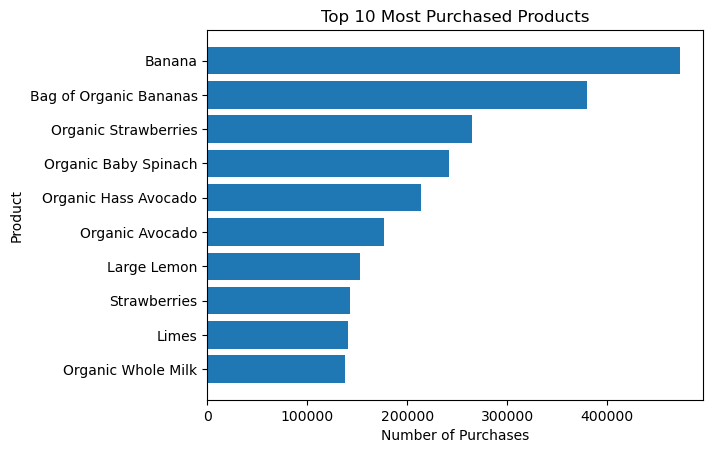

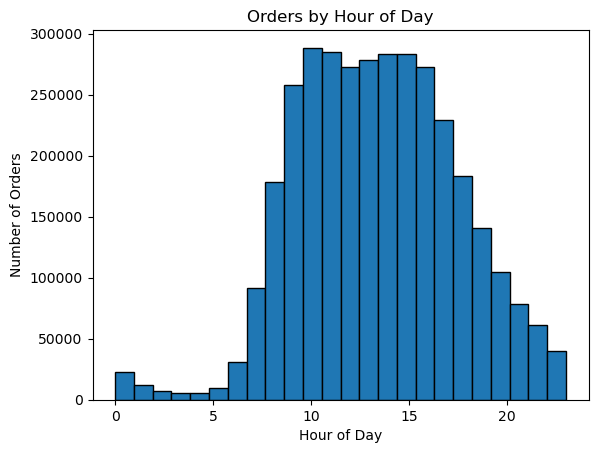

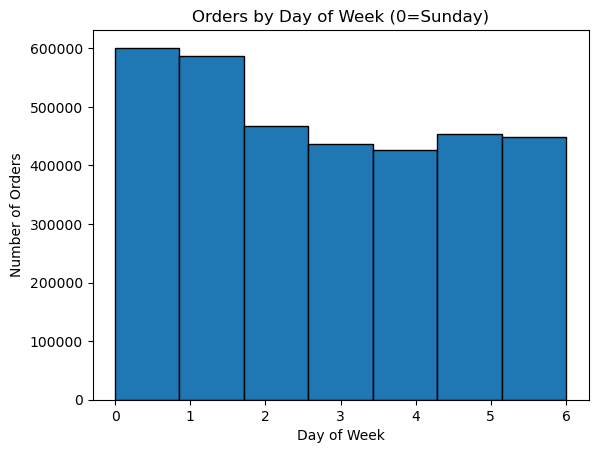

In [13]:
import matplotlib.pyplot as plt

# Days since prior order
plt.hist(orders["days_since_prior_order"].dropna(), bins=30, edgecolor="black")
plt.title("Distribution of Days Since Prior Order")
plt.xlabel("Days")
plt.ylabel("Number of Orders")
plt.show()

# Top 10 products by purchase count
popular_products = (
    order_products_prior["product_id"]
    .value_counts()
    .head(10)
    .rename_axis("product_id")
    .reset_index(name="purchases")
    .merge(products, on="product_id", how="left")
)

plt.barh(popular_products["product_name"], popular_products["purchases"])
plt.gca().invert_yaxis()  # Highest on top
plt.title("Top 10 Most Purchased Products")
plt.xlabel("Number of Purchases")
plt.ylabel("Product")
plt.show()

# Order hour of day
plt.hist(orders["order_hour_of_day"], bins=24, edgecolor="black")
plt.title("Orders by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
plt.show()

# Order day of week 
plt.hist(orders["order_dow"], bins=7, edgecolor="black")
plt.title("Orders by Day of Week (0=Sunday)")
plt.xlabel("Day of Week")
plt.ylabel("Number of Orders")
plt.show()

In [14]:
# Merge orders with prior order products on 'order_id' -> Link users with their prior orders
merged_df = pd.merge(orders, order_products_prior, on="order_id")
merged_df

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0
...,...,...,...,...,...,...,...,...,...,...
32434484,2977660,206209,prior,13,1,12,7.0,14197,5,1
32434485,2977660,206209,prior,13,1,12,7.0,38730,6,0
32434486,2977660,206209,prior,13,1,12,7.0,31477,7,0
32434487,2977660,206209,prior,13,1,12,7.0,6567,8,0


In [15]:
# Merge the result dataframe with products on 'product_id' -> link orders with product details
merged_df = pd.merge(merged_df, products, on='product_id')

In [16]:
print(f"Total historical purchase records {len(merged_df)}")

Total historical purchase records 32434489


In [17]:
merged_df.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7
1,2539329,1,prior,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16
2,2539329,1,prior,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19
3,2539329,1,prior,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19
4,2539329,1,prior,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17


## CLARITY ABOUT THE DATASET
- The prior split contains the previous orders of each user, except their last 2 orders
- The train split contains the second last order of each user with product labels (supervised learning)
- The test split contains the last order of each user without product labels (used for evaluation)

In [18]:
train_orders = orders[orders['eval_set']=="train"]

In [19]:
print(len(train_orders))

131209


In [20]:
order_products_train = pd.read_csv(os.path.join(data_path, 'order_products__train.csv'))

In [21]:
# Merge to get training set
train_df = pd.merge(train_orders, order_products_train, on='order_id')

In [22]:
train_df

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,1187899,1,train,11,4,8,14.0,196,1,1
1,1187899,1,train,11,4,8,14.0,25133,2,1
2,1187899,1,train,11,4,8,14.0,38928,3,1
3,1187899,1,train,11,4,8,14.0,26405,4,1
4,1187899,1,train,11,4,8,14.0,39657,5,1
...,...,...,...,...,...,...,...,...,...,...
1384612,272231,206209,train,14,6,14,30.0,40603,4,0
1384613,272231,206209,train,14,6,14,30.0,15655,5,0
1384614,272231,206209,train,14,6,14,30.0,42606,6,0
1384615,272231,206209,train,14,6,14,30.0,37966,7,0


In [23]:
# This train_df is the ground truth. For the final training set, we need positive and negative samples
# - Positive sample - A product the user did reorder
# - Negative sample - A product the user has bought in the past, but did not reorder this time

In [24]:
# Get list of all unique products each user has ever bought
user_history = merged_df.groupby('user_id')['product_id'].apply(set).reset_index()

In [25]:
user_history

,user_id,product_id
0,1,"{17122, 196, 26405, 14084, 46149, 26088, 13032..."
1,2,"{45066, 2573, 18961, 1559, 32792, 23, 22559, 1..."
2,3,"{17668, 44683, 48523, 21903, 14992, 21137, 324..."
3,4,"{21573, 17769, 35469, 43704, 37646, 1200, 1186..."
4,5,"{28289, 11777, 40706, 48775, 20754, 6808, 1398..."
...,...,...
206204,206205,"{20995, 21137, 22035, 21910, 17691, 31404, 210..."
206205,206206,"{16896, 44033, 18434, 16387, 21508, 45573, 102..."
206206,206207,"{20995, 18441, 45578, 47626, 33806, 22035, 235..."
206207,206208,"{1025, 20995, 47626, 8203, 5133, 38419, 27156,..."


In [26]:
user_history.rename(columns={"product_id":"all_products"}, inplace=True)

In [27]:
user_history.head()

,user_id,all_products
0,1,"{17122, 196, 26405, 14084, 46149, 26088, 13032..."
1,2,"{45066, 2573, 18961, 1559, 32792, 23, 22559, 1..."
2,3,"{17668, 44683, 48523, 21903, 14992, 21137, 324..."
3,4,"{21573, 17769, 35469, 43704, 37646, 1200, 1186..."
4,5,"{28289, 11777, 40706, 48775, 20754, 6808, 1398..."


In [28]:
# List of products that were in each user's training cart
train_products = train_df.groupby('user_id')['product_id'].apply(set).reset_index()
train_products.rename(columns={"product_id":"train_products"}, inplace=True)

In [29]:
train_products

,user_id,train_products
0,1,"{196, 26405, 27845, 46149, 13032, 39657, 26088..."
1,2,"{24838, 11913, 45066, 31883, 48523, 38547, 248..."
2,5,"{40706, 21413, 20843, 48204, 21616, 19057, 201..."
3,7,"{17638, 29894, 47272, 45066, 13198, 37999, 408..."
4,8,"{27104, 15937, 5539, 41540, 31717, 48230, 2224..."
...,...,...
131204,206199,"{18952, 38930, 35221, 7702, 18345, 6701, 43821..."
131205,206200,"{46979, 21137, 35221, 39190, 29344, 22312, 228..."
131206,206203,"{36929, 14050, 37188, 31915, 15693, 41007, 263..."
131207,206205,"{1158, 21137, 22035, 24852, 42265, 46886, 3140..."


In [30]:
# Combine user history and training data
user_data = pd.merge(user_history, train_products, on="user_id")

In [31]:
user_data.head()

,user_id,all_products,train_products
0,1,"{17122, 196, 26405, 14084, 46149, 26088, 13032...","{196, 26405, 27845, 46149, 13032, 39657, 26088..."
1,2,"{45066, 2573, 18961, 1559, 32792, 23, 22559, 1...","{24838, 11913, 45066, 31883, 48523, 38547, 248..."
2,5,"{28289, 11777, 40706, 48775, 20754, 6808, 1398...","{40706, 21413, 20843, 48204, 21616, 19057, 201..."
3,7,"{11520, 35333, 519, 10504, 47623, 45066, 13198...","{17638, 29894, 47272, 45066, 13198, 37999, 408..."
4,8,"{11136, 8193, 17794, 26882, 39812, 24838, 651,...","{27104, 15937, 5539, 41540, 31717, 48230, 2224..."


In [32]:
# Products that are not in training order but are in history -> negative samples
user_data['negative_samples'] = user_data.apply(lambda row: row['all_products'] - row['train_products'], axis=1)

In [33]:
user_data.head()

,user_id,all_products,train_products,negative_samples
0,1,"{17122, 196, 26405, 14084, 46149, 26088, 13032...","{196, 26405, 27845, 46149, 13032, 39657, 26088...","{17122, 14084, 12427, 35951, 30450, 10326, 131..."
1,2,"{45066, 2573, 18961, 1559, 32792, 23, 22559, 1...","{24838, 11913, 45066, 31883, 48523, 38547, 248...","{2573, 18961, 1559, 23, 13351, 47144, 10305, 3..."
2,5,"{28289, 11777, 40706, 48775, 20754, 6808, 1398...","{40706, 21413, 20843, 48204, 21616, 19057, 201...","{28289, 11777, 48775, 20754, 6808, 13988, 2423..."
3,7,"{11520, 35333, 519, 10504, 47623, 45066, 13198...","{17638, 29894, 47272, 45066, 13198, 37999, 408...","{11520, 35333, 519, 10504, 47623, 274, 27156, ..."
4,8,"{11136, 8193, 17794, 26882, 39812, 24838, 651,...","{27104, 15937, 5539, 41540, 31717, 48230, 2224...","{11136, 8193, 17794, 26882, 39812, 24838, 651,..."


In [34]:
positive_samples = []
negative_samples = []

In [35]:
for index, row in user_data.iterrows():
    for product in row['train_products']:
        positive_samples.append({'user_id': row['user_id'], 'product_id':product, 'y':1})

    for product in row['negative_samples']:
        negative_samples.append({'user_id': row['user_id'], 'product_id':product, 'y':0})

In [36]:
positive_df = pd.DataFrame(positive_samples)
negative_df = pd.DataFrame(negative_samples)

In [37]:
positive_df.shape

(1384617, 3)

In [38]:
negative_df.shape

(7645837, 3)

In [39]:
final_train_df = pd.concat([positive_df, negative_df]).reset_index(drop=True)

In [40]:
final_train_df.head()

,user_id,product_id,y
0,1,196,1
1,1,26405,1
2,1,27845,1
3,1,46149,1
4,1,13032,1


In [41]:
final_train_df.shape

(9030454, 3)

In [42]:
# One hot encoding of features
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)

X_sparse = encoder.fit_transform(final_train_df[['user_id', 'product_id']])

y = final_train_df['y'].values

In [43]:
print(f"Shape of the final feature matrix X: {X_sparse.shape}")
print(f"Shape of the final target vector y: {y.shape}")

Shape of the final feature matrix X: (9030454, 180736)
Shape of the final target vector y: (9030454,)


### The dataset is ready for the Factorization machine. 
### It has to be noted that the data is really sparse when its one hot encoded  
### Which means that the data has to be compressed by mapping raw IDs 
### to continuous integer indices and then using embedding layers to 
### represent them as low-dimensional dense vectors. This avoids building 
### huge sparse one-hot vectors while still preserving the effect of 
### one-hot encoding + projection.

In [44]:
X_sparse.dtype

dtype('float64')

In [45]:
X_sparse[0]

<1x180736 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [55]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

class InstacartDataset(Dataset):
    """
    PyTorch Dataset for Instacart user–product interactions.

    - Maps raw user_id and product_id to continuous indices (0..N-1).
    - These indices can be used with nn.Embedding layers instead of one-hot vectors.
    - Returns (user_idx, product_idx, label) for each sample.
    """
    def __init__(self, df):
        self.df = df
        self.user_map = {original_id: i for i, original_id in enumerate(df['user_id'].unique())}
        self.product_map = {original_id: i for i, original_id in enumerate(df['product_id'].unique())}
        self.df['user_idx'] = self.df['user_id'].map(self.user_map)
        self.df['product_idx'] = self.df['product_id'].map(self.product_map)
        self.users = self.df['user_idx'].values
        self.products = self.df['product_idx'].values
        self.labels = self.df['y'].values.astype(np.float32)

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        return {
            'user':self.users[idx],
            'product': self.products[idx],
            'label': self.labels[idx]
        }

In [ ]:
class FactorizationMachineModel(nn.Module):
    """
    Simple Factorization Machine for user-product prediction.

    - Each user and product has a k-dimensional embedding (latent factors).
    - Each user and product also has a bias term, plus a global bias.
    - Prediction = global bias + user bias + product bias 
                    + dot(user_embedding, product_embedding).

    Args:
        user (Tensor): user indices (batch_size,)
        product (Tensor): product indices (batch_size,)

    Returns:
        Tensor: raw scores (logits), shape (batch_size,)
    """
    def __init__(self, num_users, num_products, k):
        super(FactorizationMachineModel, self).__init__()
        self.user_embeds = nn.Embedding(num_users, k)
        self.product_embeds = nn.Embedding(num_products, k)
        self.user_bias = nn.Embedding(num_users, 1)
        self.product_bias = nn.Embedding(num_products, 1)
        self.bias = nn.Parameter(torch.zeros(1))

    def forward(self, user, product):
        user_v = self.user_embeds(user)
        product_v = self.product_embeds(product)
        user_w = self.user_bias(user)
        product_w = self.product_bias(product)

        linear_term = self.bias + user_w + product_w
        interaction_term = (user_v * product_v).sum(1, keepdim=True)

        raw_prediction = linear_term + interaction_term
        return raw_prediction.squeeze()

In [53]:
K_FACTORS = 32
BATCH_SIZE = 1024
EPOCHS = 5
LEARNING_RATE = 1e-3

dataset = InstacartDataset(final_train_df)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

model = FactorizationMachineModel(
    num_users = len(dataset.user_map),
    num_products = len(dataset.product_map),
    k = K_FACTORS
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print(f"\nUsing device: {device}")

criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

print("\n Starting pointwise LTR training")
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for batch in dataloader:
        users = batch['user'].to(device)
        products = batch['product'].to(device)
        labels = batch['label'].to(device)

        outputs = model(users, products)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()

    avg_loss = total_loss/len(dataloader)
    print(f"EPOCH {epoch+1}/{EPOCHS}, Loss: {avg_loss:.4f}")


Using device: cuda

 Starting pointwise LTR training
EPOCH 1/5, Loss: 1.3569
EPOCH 2/5, Loss: 0.7673
EPOCH 3/5, Loss: 0.5664
EPOCH 4/5, Loss: 0.4598
EPOCH 5/5, Loss: 0.3968
